In [12]:
import scipy.signal as sg
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft

In [2]:
ν1 = 0.15
ν2 = 0.20
deltaF=ν2-ν1
fc=(ν2+ν1)/2

# Déterminer le nombre de coefficients nécessaires
# pour qu’un filtre RIF respecte les contraintes données par le gabarit précédent.

In [3]:
def calcul_nb_coef():  
    δ1=(ν1+ν2)/2
    δ2=(1+δ1)/10**2
    return int(np.around(2/3*np.log10(1/(10*δ1*δ2))*1/(deltaF)))

In [4]:
M=calcul_nb_coef()
M 

22

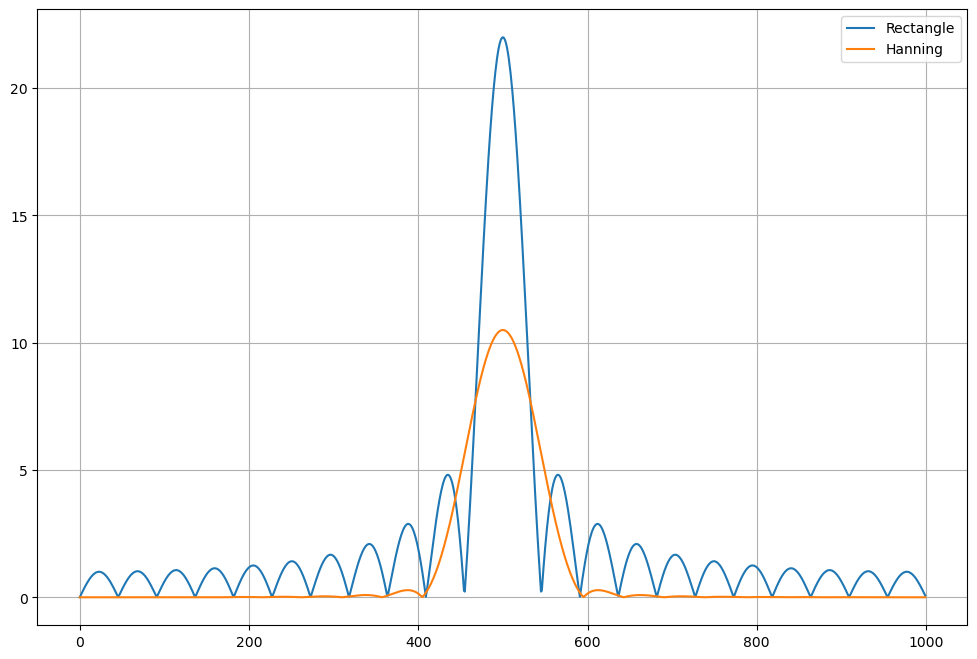

In [5]:
rect=np.ones(M)
han=sg.hann(M)
x=np.arange(1000)
k=np.arange(M)-M//2
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(x,np.abs(np.fft.fftshift(fft(rect,1000))),label='Rectangle')
plt.plot(x,np.abs(np.fft.fftshift(fft(han,1000))),label='Hanning')
plt.legend()
plt.show()

In [6]:
M=22
k

array([-11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10])

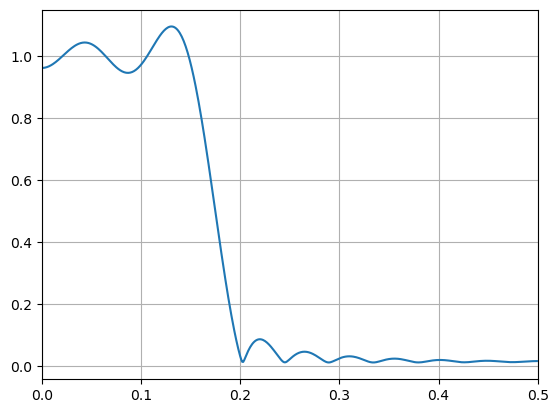

In [8]:
plt.grid()
rect=2*fc*np.sinc(2*fc*k)
sign=np.abs(np.fft.fftshift(fft(rect,1000)))
x2=np.arange(1000)/1000-0.5
plt.plot(x2,sign)
plt.xlim([0,0.5])
plt.show()

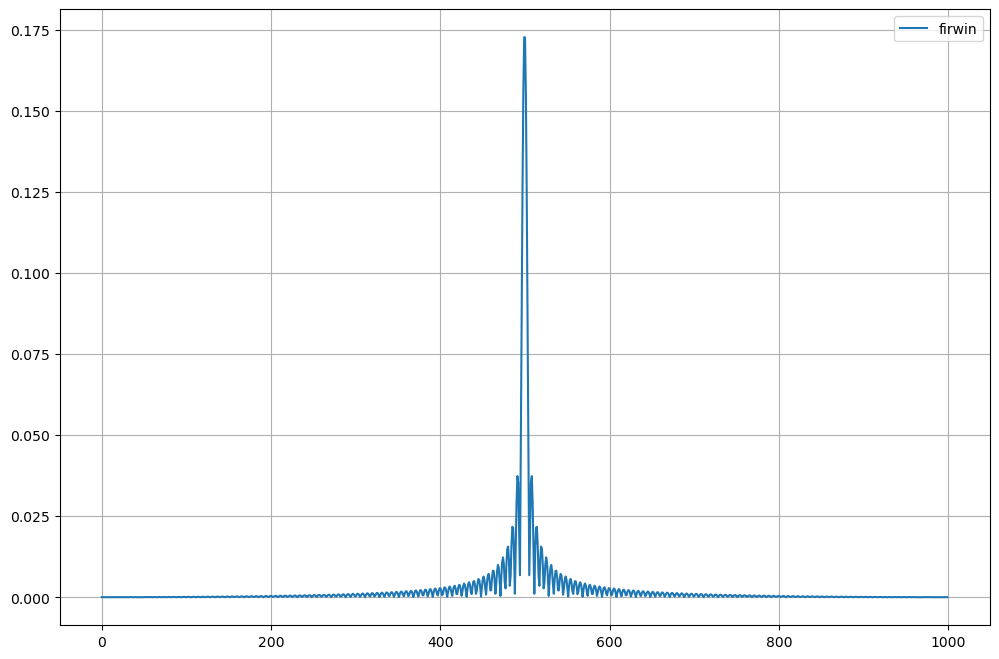

In [9]:
plt.figure(figsize=(12,8))
p=np.arange(1000)
plt.grid()
plt.plot(p,np.abs(sg.firwin(1000,fc)),label='firwin')
plt.legend()

### 4. Tester les 4 filtres obtenus sur différents signaux ayant des composantes fréquentielles acceptables et d’autres non, qui mettent en avant les propriétés spectrales des filtres

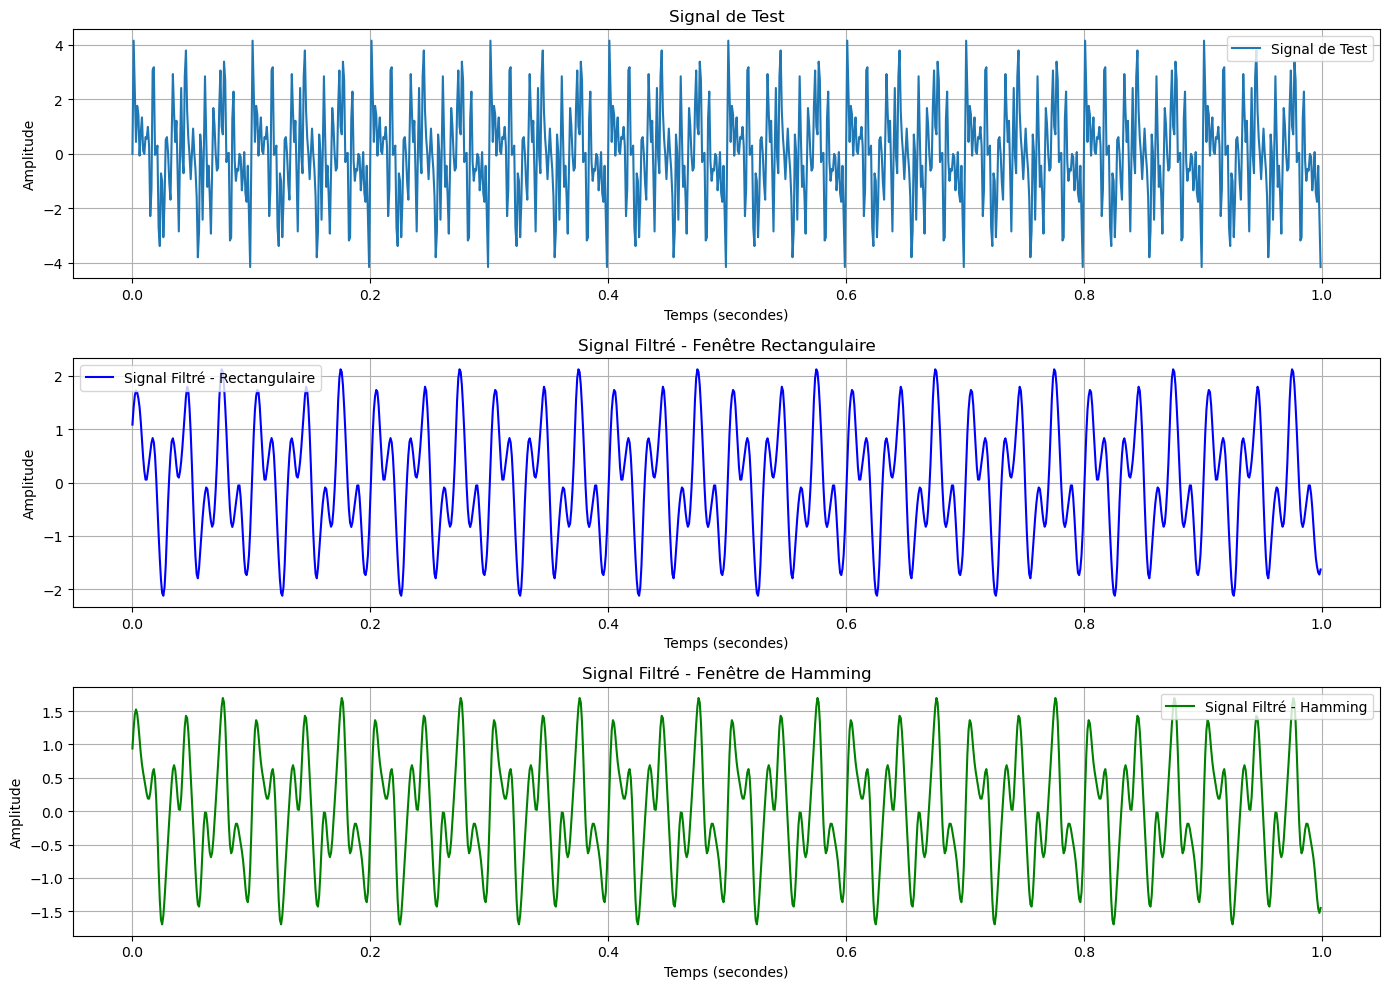

In [13]:
coeffs_rect_window = sg.firwin(numtaps=M, cutoff=fc, window='boxcar', pass_zero='lowpass')
coeffs_hamming_window = sg.firwin(numtaps=M, cutoff=fc, window='hamming', pass_zero='lowpass')
fs = 1000  
t = np.linspace(0, 1, fs, endpoint=False) 
frequencies = [30, 70, 120, 180, 250, 300]
signal_test = sum(np.sin(2 * np.pi * f * t) for f in frequencies)
filtered_test_rect = np.convolve(signal_test, coeffs_rect_window, mode='same')
filtered_test_hamming = np.convolve(signal_test, coeffs_hamming_window, mode='same')

plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(t, signal_test, label='Signal de Test')
plt.title("Signal de Test")
plt.xlabel("Temps (secondes)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, filtered_test_rect, label='Signal Filtré - Rectangulaire', color='blue')
plt.title("Signal Filtré - Fenêtre Rectangulaire")
plt.xlabel("Temps (secondes)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, filtered_test_hamming, label='Signal Filtré - Hamming', color='green')
plt.title("Signal Filtré - Fenêtre de Hamming")
plt.xlabel("Temps (secondes)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
